# Question.1

1.The monthly average atmospheric pressure (in mb) measured at surface level for 24 consecutive
months are 963.65, 965.03, 961.18, 959.43, 957.68, 953.42, 950.11, 952.44, 952.25, 956.88, 963.66,
963.36, 965.56, 964.5, 963.66, 960.91, 956.9, 952.18, 950.71, 952.54, 951.43, 955.06, 959.01, and
962.60. Find the autocorrelation and partial autocorrelation functions at lags 0, 1, 2, and 3. Ans.
Autocorrelation function at lag 0, 1, 2, and 3 are 1, 0.782, 0.414, and 0.008 respectively. Partial
autocorrelation function at lag 0, 1, 2, and 3 are 1, 0.807, −0.617, and −0.481 respectively.

In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [18]:
data_press = np.array([963.65, 965.03, 961.18, 959.43, 957.68, 953.42, 950.11, 952.44, 952.25, 956.88, 963.66,
963.36, 965.56, 964.5, 963.66, 960.91, 956.9, 952.18, 950.71, 952.54, 951.43, 955.06, 959.01,962.60])

In [19]:
# Compute autocorrelation function
acf_result = sm.tsa.acf(data_press, nlags=3)

# Compute partial autocorrelation function
pacf_result = sm.tsa.pacf(data_press, nlags=3)

In [20]:
# Create a DataFrame to display the results
results_df = pd.DataFrame({'Autocorrelation': acf_result, 'Partial Autocorrelation': pacf_result})
results_df.index.name = 'Lag'
results_df

,Autocorrelation,Partial Autocorrelation
Lag,,
0,1.000000,1.000000
1,0.781602,0.815584
2,0.413943,-0.637962
3,0.008481,-0.368929


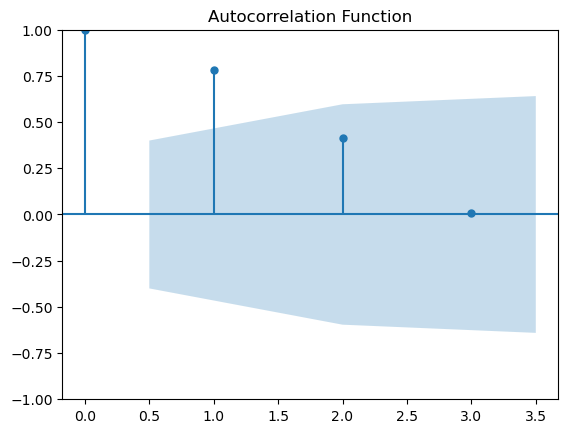

In [21]:
# Plot autocorrelation function
plot_acf(data_press, lags=3)
plt.title('Autocorrelation Function')
plt.show()

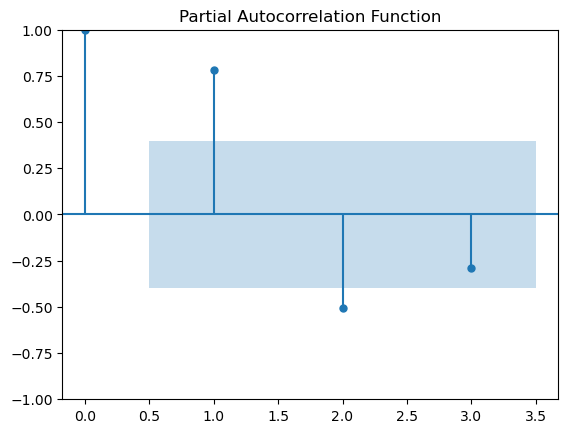

In [22]:
# Plot partial autocorrelation function
plot_pacf(data_press, lags=3)
plt.title('Partial Autocorrelation Function')
plt.show()

# Question.2

2.The annual evapotranspiration (in cm/year) for a basin in last 20 years are 61.04, 58.71, 60.02,
60.36, 62.65, 64.17, 62.82, 64.41, 64.6, 63.45, 65.35, 64.65, 67.37, 66.27, 68.39, 66.77, 68.24, 68.04,
66.53, and 68.02. find the autocorrelation and partial autocorrelation coefficient at lags 0, 1 and 2.
Find the 95% confidence limit for the ACF and PACF at lag 2

In [23]:
data_precip = np.array([61.04, 58.71, 60.02,
60.36, 62.65, 64.17, 62.82, 64.41, 64.6, 63.45, 65.35, 64.65, 67.37, 66.27, 68.39, 66.77, 68.24, 68.04,
66.53,68.02])

In [24]:
acf_result = sm.tsa.acf(data_precip, nlags=3)

pacf_result = sm.tsa.pacf(data_precip, nlags=3)

In [25]:
results_df = pd.DataFrame({'Autocorrelation': acf_result, 'Partial Autocorrelation': pacf_result})
results_df.index.name = 'Lag'
results_df

,Autocorrelation,Partial Autocorrelation
Lag,,
0,1.000000,1.000000
1,0.784146,0.825417
2,0.677643,0.224747
3,0.474063,-0.362200


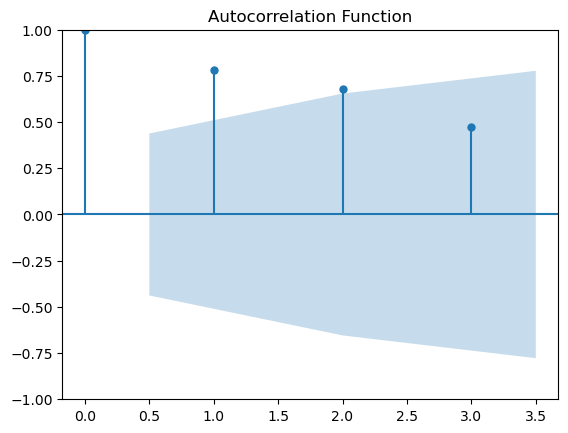

In [26]:
plot_acf(data_precip, lags=3)
plt.title('Autocorrelation Function')
plt.show()

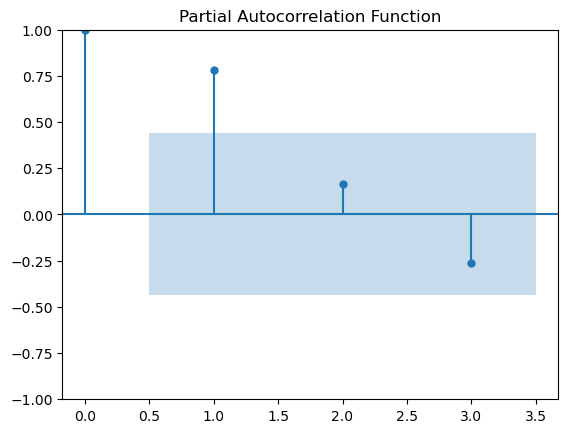

In [27]:
plot_pacf(data_precip, lags=3)
plt.title('Partial Autocorrelation Function')
plt.show()

In [28]:
# Compute autocorrelation function
acf_result, acf_confint = sm.tsa.acf(data_precip, nlags=2, alpha=0.05)

# Compute partial autocorrelation function
pacf_result, pacf_confint = sm.tsa.pacf(data_precip, nlags=2, alpha=0.05)

# Calculate confidence limits for ACF at lag 2
acf_lower_limit, acf_upper_limit = acf_confint[2]

# Calculate confidence limits for PACF at lag 2
pacf_lower_limit, pacf_upper_limit = pacf_confint[2]

print("95% Confidence Limits for ACF at Lag 2:", acf_lower_limit, acf_upper_limit)
print("95% Confidence Limits for PACF at Lag 2:", pacf_lower_limit, pacf_upper_limit)

95% Confidence Limits for ACF at Lag 2: 0.023213310895301098 1.3320728389975112
95% Confidence Limits for PACF at Lag 2: -0.2135137740420022 0.6630087665345793


# Question.3

At a location, the daily air temperature follows the ARMA(2,1) model given below, X(t) = 0.7X(t −1) + 0.2X(t − 2). If the air temperature recorded in the last week (in ◦C) was 16.5,
15.2, 18.2, 16.3, 19.4, 17.8, and 15.7, then forecast air temperature and their 95% confidence limit
for next three days. Assume that the variance of residual is unity. Further, update the forecast for
remaining two days, if the temperature on eighth day is recorded as 14.5◦C

Part.a

In [29]:
# Coefficients used for ARMA model
ce_1 = 0.7
ce_2 = 0.2

# Given observations
observations = [16.5, 15.2, 18.2, 16.3, 19.4, 17.8, 15.7]

# How many observations?
n = len(observations)

# Initial values for the ARMA model
Val_tm1 = observations[-1]
Val_tm2 = observations[-2]

# Next 3 days forecasting
forecast = []
for _ in range(3):
    Val_tm = ce_1 * Val_tm1 + ce_2 * Val_tm2
    forecast.append(Val_tm)
    # Update values for next iteration
    Val_tm2 = Val_tm1
    Val_tm1 = Val_tm

# 95% confidence limit calculation assuming the variance of the residuals is unity
z_critical = 1.96  # for 95% confidence interval
conf_interval = z_critical * np.sqrt(1)

# Printing forecast and confidence intervals
for i, value in enumerate(forecast, start=1):
    print(f"Day {n+i}: Forecasting Temperature = {value:.2f}°C, 95% Confidence Interval = [{value - conf_interval:.2f}, {value + conf_interval:.2f}]°C")

Day 8: Forecasting Temperature = 14.55°C, 95% Confidence Interval = [12.59, 16.51]°C
Day 9: Forecasting Temperature = 13.32°C, 95% Confidence Interval = [11.36, 15.29]°C
Day 10: Forecasting Temperature = 12.24°C, 95% Confidence Interval = [10.28, 14.20]°C


Part.b

In [30]:
# Coefficients used for ARMA model
ce_1 = 0.7
ce_2 = 0.2

# Given observations
observations = [16.5, 15.2, 18.2, 16.3, 19.4, 17.8, 15.7,14.5]

# How many observations?
n = len(observations)

# Initial values for the ARMA model
Val_tm1 = observations[-1]
Val_tm2 = observations[-2]

# Next 2 days forecasting
forecast = []
for _ in range(2):
    Val_tm = ce_1 * Val_tm1 + ce_2 * Val_tm2
    forecast.append(Val_tm)
    # Update values for next iteration
    Val_tm2 = Val_tm1
    Val_tm1 = Val_tm

# 95% confidence limit calculation assuming the variance of the residuals is unity
z_critical = 1.96  # for 95% confidence interval
conf_interval = z_critical * np.sqrt(1)

# Printing forecast and confidence intervals
for i, value in enumerate(forecast, start=1):
    print(f"Day {n+i}: Forecasting Temperature = {value:.2f}°C, 95% Confidence Interval = [{value - conf_interval:.2f}, {value + conf_interval:.2f}]°C")

Day 9: Forecasting Temperature = 13.29°C, 95% Confidence Interval = [11.33, 15.25]°C
Day 10: Forecasting Temperature = 12.20°C, 95% Confidence Interval = [10.24, 14.16]°C
